<a href="https://colab.research.google.com/github/marcusbenard/cybercraft-academy/blob/main/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3886520051.py:94: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(


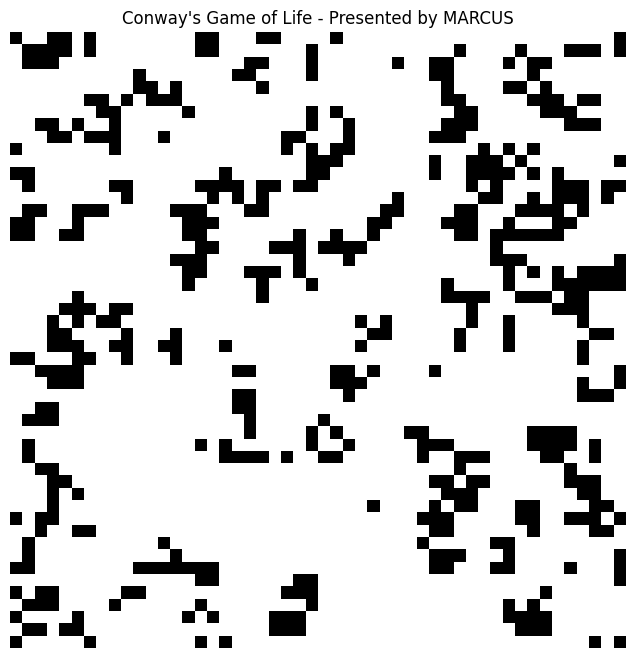

In [ ]:
# Conway's Game of Life: A Cellular Automaton Simulation
# Presented by MARCUS
#
# Overview:
# This program simulates Conway's Game of Life, a cellular automaton created by John Conway in 1970.
# It's a "zero-player" game where simple rules lead to complex, emergent patterns like gliders and oscillators.
# Why interesting? It shows how complexity arises from simplicity, relevant to computer science, biology, and art.
# For beginners: Learn 2D arrays, functions, loops, and basic animation.
# For pros: Explore vectorized NumPy operations, toroidal boundaries, and optimization techniques.
#
# Requirements:
# - Python 3.x
# - Libraries: numpy, matplotlib (install via: pip install numpy matplotlib)
#
# How to run:
# Save as game_of_life.py and run: python game_of_life.py
# A window will show the animated simulation. Close the window to stop.

try:
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
except ImportError as e:
    print(f"Error: Missing required library - {e}")
    print("Please install numpy and matplotlib using: pip install numpy matplotlib")
    exit(1)

# Step 1: Define grid size and initial configuration
GRID_SIZE = 50  # Size of the square grid (50x50 balances visibility and speed)
INITIAL_DENSITY = 0.2  # Fraction of cells initially alive (0 to 1)

def initialize_grid(size, density):
    """
    Initialize a random grid of alive (1) and dead (0) cells.
    - size: Integer for NxN grid
    - density: Float (0 to 1) for probability a cell is alive
    Returns: 2D NumPy array
    Note: NumPy's vectorized operations are faster than Python lists for large grids.
    """
    return (np.random.random((size, size)) < density).astype(int)

def update_grid(grid):
    """
    Evolve the grid one step using Conway's rules:
    1. Live cell with <2 live neighbors dies (underpopulation).
    2. Live cell with 2 or 3 live neighbors survives.
    3. Live cell with >3 live neighbors dies (overpopulation).
    4. Dead cell with exactly 3 live neighbors becomes alive (reproduction).
    Uses toroidal boundaries (edges wrap around like a donut).
    """
    new_grid = np.zeros_like(grid)

    # Count neighbors by shifting grid in 8 directions and summing
    neighbors = (
        np.roll(np.roll(grid, 1, axis=0), 1, axis=1) +  # Top-left
        np.roll(grid, 1, axis=0) +                      # Top
        np.roll(np.roll(grid, 1, axis=0), -1, axis=1) + # Top-right
        np.roll(grid, 1, axis=1) +                      # Left
        np.roll(grid, -1, axis=1) +                     # Right
        np.roll(np.roll(grid, -1, axis=0), 1, axis=1) + # Bottom-left
        np.roll(grid, -1, axis=0) +                     # Bottom
        np.roll(np.roll(grid, -1, axis=0), -1, axis=1)  # Bottom-right
    )

    # Apply rules using boolean masks
    survive = (grid == 1) & ((neighbors == 2) | (neighbors == 3))
    birth = (grid == 0) & (neighbors == 3)
    new_grid[survive | birth] = 1
    return new_grid

def main():
    # Initialize grid
    grid = initialize_grid(GRID_SIZE, INITIAL_DENSITY)

    # Set up plot
    fig, ax = plt.subplots(figsize=(8, 8))
    img = ax.imshow(grid, cmap='binary', interpolation='nearest')
    ax.set_title("Conway's Game of Life - Presented by MARCUS")
    ax.axis('off')

    # Animation function
    def animate(frame, grid, img):
        """
        Update grid and image for each animation frame.
        - frame: Integer (required by FuncAnimation, unused here)
        - grid: 2D array (passed to maintain state)
        - img: Matplotlib image object to update
        """
        grid = update_grid(grid)
        img.set_array(grid)
        return [img]

    # Create animation
    ani = animation.FuncAnimation(
        fig, animate, fargs=(grid, img),
        frames=None, interval=100, blit=True
    )

    # Show plot
    plt.show()

if __name__ == "__main__":
    main()

# Learning Extensions:
# - Beginners: Change GRID_SIZE or INITIAL_DENSITY to see different behaviors.
# - Example: Set grid[10:13, 10:13] = [[0,1,0],[0,0,1],[1,1,1]] for a glider pattern.
# - Pros: Use scipy.signal.convolve2d for faster neighbor counting.
# - Fun fact: Game of Life is Turing complete; it can simulate any computer with enough cells!